#  Uncommon Data Cleaners for your Real-World Machine or Deep Learning Project

## import local

In [1]:
!conda list

# packages in environment at /Users/brucecottman/anaconda3/envs/paso:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0                    py37_0  
absl-py                   0.7.0                    pypi_0    pypi
alabaster                 0.7.12                   py37_0  
anaconda-client           1.7.2                    py37_0  
anaconda-navigator        1.9.6                    py37_0  
anaconda-project          0.8.2                    py37_0  
ansimarkup                1.4.0                    pypi_0    pypi
appnope                   0.1.0                    py37_0  
appscript                 1.0.1            py37h1de35cc_1  
asn1crypto                0.24.0                   py37_0  
astor                     0.7.1                    pypi_0    pypi
astroid                   2.1.0                    py37_0  
astropy                   3.1              py37h1de35cc_0  
astunparse                1.6.2                    pypi_0    py

In [2]:
from __future__ import print_function
__file__ = !cd .. ;pwd
__file__ = __file__[0]
__file__

'/Users/brucecottman/Documents/PROJECTS/paso'

In [3]:
import sys
from random import random
sys.path.append(__file__)
sys.path

['/Users/brucecottman/Documents/PROJECTS/paso/lessons',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python37.zip',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/lib-dynload',
 '',
 '/Users/brucecottman/.local/lib/python3.7/site-packages',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages/aeosa',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages/IPython/extensions',
 '/Users/brucecottman/.ipython',
 '/Users/brucecottman/Documents/PROJECTS/paso']

In [4]:
sys.path.append(__file__)
sys.path

['/Users/brucecottman/Documents/PROJECTS/paso/lessons',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python37.zip',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/lib-dynload',
 '',
 '/Users/brucecottman/.local/lib/python3.7/site-packages',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages/aeosa',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages/IPython/extensions',
 '/Users/brucecottman/.ipython',
 '/Users/brucecottman/Documents/PROJECTS/paso',
 '/Users/brucecottman/Documents/PROJECTS/paso']

In [5]:
import sys
from random import random
from tqdm import tqdm
import numpy as np
import pandas as pd
from pandas_summary import DataFrameSummary

import warnings
warnings.filterwarnings("ignore")
import multiprocessing
OMP_NUM_THREADS=1
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

%reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
import seaborn as sns
color = sns.color_palette()
sns.set(rc={'figure.figsize':(6,4)})

## Overview

Data cleaning is a subject that is lightly touched in your brick&mortar or on-line classes. However, in your work as a Data Engineer or Data Scientist you will spend a great deal of your time getting ready (pre-processing) your data so that it can be input into your model. 

Data cleaning is critical if you are going to create a service for production.

[What 70% of Data Science Learners Do Wrong](https://towardsdatascience.com/what-70-of-data-science-learners-do-wrong-ac35326219e4)

    Corporate data science is still a new field. Many academics haven't worked on real problems for real businesses yet. So they teach textbook algorithms in a way that's separated from data and business context. This can be intellectually fun. But, students are mistaken if they assume these courses prepare them well to work as data scientists.

**paso** will supply many but not all the tools you need to clean the data. 

Just because **paso** supplies a tool, does not mean you should use it on your dataset. For example, usually removing rows that have a high density of ``NaN``s will result in a worse loss metric or unwanted bias, but not all the time.

Iteration of over different cleaning strategies (pipelines) is an important goal of **paso**. Discussion will be divided into the following major segments:
- First we load the ``boston``  dataset with a **paso** Inputer. It is has a relatively low number of rows, while having less than 10 features, to yield fast cleaning.
- Following this, I demonstrate each cleaner by munging the relatively clean ``boston`` dataset.
- Finally, we summarize **paso**'s data cleaners and what we have planned for future articles and **paso** releases.


## Input Dataset: boston

As we saw in this lesson:

[paso's Offering of Logging and Parameter Services for your Python Project](https://github.com/bcottman/paso/blob/master/lessons/lesson-1.ipynb), we need to startup **paso** services and input a dataset.  

In [6]:
from paso.base import Paso,Log,PasoError
from loguru import logger
session = Paso(parameters_filepath='../parameters/lesson.2.yaml').startup()

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely
paso 6.11.2019 12:45:58 INFO Log started
paso 6.11.2019 12:45:58 INFO ========================================
paso 6.11.2019 12:45:58 INFO Read in parameter file: ../parameters/lesson.2.yaml


We will use the ``Inputer`` with only the explanation that it is a generic class for inputing data into a **pandas** dataframe. The  dataset is described by the description file: ``city.yaml``. Both ``inputer``and description files are discussed in [lesson-3]( lessons/lesson-3.ipynb).

Next, we load the ``boston`` data set into the ``dataset``dataframe. We will munge ``dataset`` up to show what the **paso** cleaners can do.

In [7]:
from paso.pre.inputers import Inputers
dataset_name = 'boston'
inputer = Inputers(description_filepath='../descriptions/pre/inputers/'+dataset_name+'.yaml')
dataset = inputer.transform()
inputer.target

'MEDV'

## Munging up a dataset

Normally, we get data and have to clean it. Such datasets are proprietary. After all, no-one wants to show their dirty data to the public (groan).

To show how these data cleaners work, we can have some fun and munge a clean dataset.

## Cleaner: value to Missing

Detecting and correcting for missing and outlier (good or bad) values is an evolving area of research. We will cover outlier values in the lesson on Scalers. For this lesson we will just focus on missing values.

Different values can indicate, a value is missing. For example,
- ``999`` could mean "did not answer" in some features.
- ``NA`` could mean not-applicable for this feature/record.
- ``-1`` could mean missing for this feature/record-1could mean missing for this feature/record`.
and so on.

For the first shown cleaner, we add in the feature ``asv`` which has all the same values ``999``.

In [8]:
DataFrameSummary(dataset).summary()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506,506,506,506,506,506,506,506,506,506,506,506,506,506
mean,3.61352,11.3636,11.1368,0.06917,0.554695,6.28463,68.5749,3.79504,9.54941,408.237,18.4555,356.674,12.6531,22.5328
std,8.60155,23.3225,6.86035,0.253994,0.115878,0.702617,28.1489,2.10571,8.70726,168.537,2.16495,91.2949,7.14106,9.1971
min,0.00632,0,0.46,0,0.385,3.561,2.9,1.1296,1,187,12.6,0.32,1.73,5
25%,0.082045,0,5.19,0,0.449,5.8855,45.025,2.10018,4,279,17.4,375.377,6.95,17.025
50%,0.25651,0,9.69,0,0.538,6.2085,77.5,3.20745,5,330,19.05,391.44,11.36,21.2
75%,3.67708,12.5,18.1,0,0.624,6.6235,94.075,5.18843,24,666,20.2,396.225,16.955,25
max,88.9762,100,27.74,1,0.871,8.78,100,12.1265,24,711,22,396.9,37.97,50
counts,506,506,506,506,506,506,506,506,506,506,506,506,506,506
uniques,504,26,76,2,81,446,356,412,9,66,46,357,455,229


In [9]:
from paso.pre.cleaners import Cleaners
c = Cleaners()
dataset['asv'] = 999.0
c.values_to_nan(dataset,values=[999.,11999.],inplace=True)
dataset.head()

paso 6.11.2019 12:45:58 WARNING No description_filepath instance:, args: (<paso.pre.cleaners.Cleaners object at 0x7fde10c97048>,),kwargs: {}
paso 6.11.2019 12:45:58 INFO Values_to_nan [999.0, 11999.0]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,asv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,NaN
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,NaN
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,NaN
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,NaN
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,NaN


This cleaner, ``c.values_to_nan`` changed all ```999```values to ```NaN```.  Notice also, as ```inplace=True```, the dataset was changed itself, saving memory by avoiding copying ``dataset``.

## Cleaner:  delete_NaN_Features

Having a sufficiently large ratio of missing values for
a feature renders it statistically irrelevant, you can
remove this feature from the dataset. In this, I am being fairly conservative by only removing features that have more than 90% ``NaN`` values, Only the ``asv`` feature qualifies. Let's see if it is removed and only it is removed.

In [10]:
c.delete_NA_Features(dataset,threshold=0.9)
dataset.head(n=2)

paso 6.11.2019 12:45:58 INFO Delete_NA_Features: ['asv']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


## Cleaner: calculate_NaN_ratio

For a row with a large ratio of missing values (an observation)
renders it statistically irrelevant. Similarly, you may want to **impute**  missing values, that is change missing values to some other determined value. 

The number  of missing values per row is more information, which in itself, argues that it should be a new feature for this dataset.

With this ```Cleaner```, the row with the ```NaN``` is not removed 
instead, the ``nulls/total_feature_count`` is calculated for each row and
a new feature  ``NaN_ratio``is added to the returned **pandas** dataframe.


We will use the same ```Cleaner``` instance, ```c```, again. Also, let's munge the dataset some more, by setting the first row of the first and second feature to ``NaN``.

In [11]:
dataset.iloc[0,0] = np.NaN
dataset.iloc[0,1] = np.NaN
c.calculate_NaN_ratio(dataset,inplace=True)
dataset.head(n=4)

paso 6.11.2019 12:45:58 INFO Calculate_NA_ratio


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,NaN_ratio
0,NaN,NaN,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0.142857
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0.000000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0.000000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0.000000


Notice there is a new feature, ```NaN_ratio```. As we expected, the ``NaN/total_feature_count`` ratio is different for the first row from the second row.

The ``Cleaner`` attribute column_missing_value_ratio contains each feature missing value ratio. Hint: You can use these in a stacking ensemble. We will cover this in another article.

In [12]:
c.column_missing_value_ratio

CRIM       0.001976
ZN         0.001976
INDUS      0.000000
CHAS       0.000000
NOX        0.000000
RM         0.000000
AGE        0.000000
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      0.000000
MEDV       0.000000
dtype: float64

Good. Only the ``asv`` feature was removed.

## Imputer: changing NaN to values

Setting ``NaN``s to their best approximation is the key to your data cleaning efforts and further down stream your predictive accuracy and power. A popular article [succinct article on the subject:](https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779).

    "Many real-world datasets may contain missing values for various reasons. They are often encoded as NaNs, blanks or any other placeholders. Training a model with a dataset that has a lot of missing values can drastically impact the machine learning model’s quality. Some algorithms such as scikit-learn estimators assume that all values are numerical and have and hold meaningful value.
    One way to handle this problem is to get rid of the observations that have missing data. However, you will risk losing data points with valuable information. A better strategy would be to impute the missing values. In other words, we need to infer those missing values from the existing part of the data"

Another great [article on imputing](https://medium.com/ibm-data-science-experience/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87)
states:

    "For us to fully understand the importance of missing data, we need to comprehensively identify the reasons for missing data occurrence. The first step is to understand your data and more importantly, the data collection process. This can lead to the possibility of reducing data collection errors. The nature or mechanism of missing data can be categorized into three major classes.
    1) Missing Completely at Random (MCAR)
    2) Missing at Random (MAR)
    3) Missing Not at Random (MNAR)
    
    
We offer a smorgasbord of impute strategies as  shown by ``Imputers().imputers()``. I suggest you read these and other articles on imputing missing values so you can best use these tools.

In [13]:
from paso.pre.cleaners import Imputers
Imputers().imputers()

paso 6.11.2019 12:45:59 WARNING No description_filepath instance:, args: (<paso.pre.cleaners.Imputers object at 0x7fde60884c18>,),kwargs: {}


['median', 'mean', 'most_frequent', 'random', 'knn', 'mice']

We decided to transform over a given list of features, as impute strategy can vary over subsets of features.

Note, eXtreme Gradient Boosting (``xgboost``) will automatically learn the best (for it) imputation value for the missing data based on the training loss function used.  The  Gradient Boosting  will automatically learn the best (for it) imputation value for the missing data based on the training loss function used.  The authors have named it ``eXtreme`` mainly because of this ability.  Unless you study the source code, it is a black box that works very well.

I suggest you try ``xgboost`` first and then impute and other data cleaners shown here for any incremental improvement in your prediction.

Here, I will use a simple ``most_frequent`` strategy  because it handles both categorical and continuous feature types.

In [14]:
imputer_file = "../descriptions/pre/cleaners/most_frequent_impute.yaml"
imp = Imputers(description_filepath = imputer_file)
imp.transform(dataset)

paso 6.11.2019 12:45:59 WARNING kwargs is no in dictionary:({'description': 'most_frequent value of feature is used for all NaN values', 'genus': 'Imputer', 'type': 'all-types'})
paso 6.11.2019 12:45:59 WARNING 
Keyword arg:features: not passed. All features of dataset will be checked for imputation
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'NaN_ratio'],
      dtype='object')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,NaN_ratio
0,0.01501,0.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0.142857
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0.000000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0.000000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0.000000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0.000000
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,0.000000
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9,0.000000
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1,0.000000
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5,0.000000
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9,0.000000


## Cleaner: delete_Duplicate_Features

You will rarely see two or more features with the same values in a machine learning contest. However, you will almost always see it in an enterprise with a large and/or several databases and/or data warehouses and/or data lakes. 

Duplicate features are quite common as an enterprise's database or data lake ages and different data sources are added by different people.

If a feature has the same values by index as another feature then one of those features should be deleted. The duplicate feature is redundant and will have no predictive power.

The Cleaner delete_Duplicate_Features will reduce redundant features to one unique feature.

Note, that any ``NaN``'s should be removed from the dataset before being passed to this method, ``NaN`` by definition, in Python, is not equal to another ``NaN`` . Easier, we encountered data cleaners that can remove, replace or Impute ``NaN``  values.

We will create features ``CRIM1`` and ``CRIM2`` whose values are the same as ``CRIM``.

In [15]:
dataset['CRIM1'] = dataset['CRIM12'] = dataset['CRIM']
dataset.head(n=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,NaN_ratio,CRIM1,CRIM12
0,0.01501,0.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0,0.142857,0.01501,0.01501
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6,0.000000,0.02731,0.02731


In [16]:
c.delete_Duplicate_Features(dataset, inplace=True)
dataset.head(n=2)

paso 6.11.2019 12:45:59 INFO Duplicate_Features_Removed: ['CRIM1', 'CRIM12']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,NaN_ratio
0,0.01501,0.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0.142857
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0.000000


As expected, delete_Duplicate_Features deleted features ``CRIM1`` and ``CRIM2``.

## Cleaner: delete_Features_with_Single_Unique_Value

It is common practice to store constants in data. This appears as a feature/column with one unique value. 

``NaN`` is a null value and thus is not considered a constant or value.

This method finds all the features which have only one unique value. The variation between values is zero. All these features are removed from the dataframe as they have no predictive ability.

Here I put a constant in the dataset and remove it with ``delete_Features_with_Single_Unique_Value``.

In [17]:
dataset['constant'] = 0.0
dataset.head(n=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,NaN_ratio,constant
0,0.01501,0.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0.142857,0.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0.000000,0.0


In [18]:
c.delete_Features_with_Single_Unique_Value(dataset, inplace=True)
dataset.head(n=2)

paso 6.11.2019 12:45:59 INFO Eliminate_Single_Unique_Value_Features ['constant']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,NaN_ratio
0,0.01501,0.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0.142857
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0.000000


## Cleaner: delete_Features_with_All_Unique_Values

When a feature has every value different from the other, it only has predictive value in a regression task, and then the values must be of type float or integer. 

SKUs, IDs, or names of an item will have a string or object type and will have no predictive power and only slow down the learner. Those features should be removed from the dataset.

In this example, I cause the index to be an ID, so that I can remove it.

In [19]:
dataset.reset_index(inplace=True)
dataset.head(n=5)

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,NaN_ratio
0,0,0.01501,0.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0.142857
1,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0.000000
2,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0.000000
3,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0.000000
4,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,0.000000


In [20]:
c.delete_Features_with_All_Unique_Values(dataset, inplace=True)
dataset.head(n=2)

paso 6.11.2019 12:45:59 INFO delete_Features_with_All_Unique_Values ['index']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,NaN_ratio
0,0.01501,0.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0.142857
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0.000000


## Cleaner: feature_Statistics

The ``Cleaner.feature_Statistics`` will calulate 
a set of pre-determined statistics of each feature and returns a dataframe.

The set of statistics can be shown wiih:

In [21]:
a = c.statistics()
print(a)

['kurt', 'mad', 'max', 'mean', 'median', 'min', 'sem', 'skew', 'sum', 'std', 'var', 'nunique', 'all']


This method can be used as an diagnostic tool (``concat = False``) that is used to decide if the standard deviation or any other statistic is too small and thus will have insignificant predictive power.

It can also add onto the dataset (``concat=True``), where the statistics partially describe the distribution of the values of the row. This will only make sense for those whose values are numeric (integer of float).

You may want or may not want the target to be part of the distribution. Since the test will not have the target, the target should not be part of distribution in train dataset, as you are *leaking* the target into the train dataset.

You may wish to remove the target feature and then put it back in the dataset once you are done.

In [22]:
z = c.feature_Statistics(dataset[dataset.columns.difference([inputer.target])], concat=True)
z.head(2)

paso 6.11.2019 12:46:00 INFO Features_Statistics ['kurt', 'mad', 'max', 'mean', 'median', 'min', 'sem', 'skew', 'sum', 'std', 'var', 'nunique']


,AGE,B,CHAS,CRIM,DIS,INDUS,LSTAT,NOX,NaN_ratio,PTRATIO,...,max,mean,median,min,sem,skew,sum,std,var,nunique
0,65.2,396.90,0.0,0.01501,4.0900,2.31,4.98,0.538,0.142857,15.3,...,396.90,56.646491,3.20000,0.0,33.54500,2.332462,793.050867,125.513897,15753.738222,13
1,61.1,392.83,0.0,0.02729,4.9671,7.07,4.03,0.469,0.000000,17.8,...,392.83,52.819885,4.49855,0.0,31.27484,2.506514,739.478390,117.019735,13693.618323,12


In [23]:
c.column_stats

,kurt,mad,max,mean,median,min,sem,skew,sum,std,var,nunique
AGE,-0.972455,24.642372,100.000000,68.554455,77.30000,2.90000,1.253683,-0.596526,34620.000000,28.173012,793.718596,355
B,7.204391,54.707852,396.900000,356.594376,391.43000,0.32000,4.065813,-2.886747,180080.160000,91.367787,8348.072540,357
CHAS,9.609780,0.129007,1.000000,0.069307,0.00000,0.00000,0.011313,3.401726,35.000000,0.254227,0.064631,2
CRIM,37.062242,4.790012,88.976200,3.620642,0.25915,0.00906,0.383077,5.218384,1828.424300,8.608582,74.107684,502
DIS,0.489658,1.720063,12.126500,3.792722,3.19920,1.12960,0.093767,1.014694,1915.324500,2.107150,4.440082,412
INDUS,-1.236217,6.207547,27.740000,11.144832,9.69000,0.46000,0.305478,0.291921,5628.140000,6.864761,47.124944,76
LSTAT,0.486032,5.720458,37.970000,12.660020,11.38000,1.73000,0.318012,0.903527,6393.310000,7.146426,51.071404,454
NOX,-0.068972,0.095744,0.871000,0.554865,0.53800,0.38500,0.005159,0.726175,280.206700,0.115930,0.013440,81
NaN_ratio,505.000000,0.000565,0.142857,0.000283,0.00000,0.00000,0.000283,22.472205,0.142857,0.006357,0.000040,2
PTRATIO,-0.287560,1.789327,22.000000,18.456832,19.10000,12.60000,0.096426,-0.803504,9320.700000,2.166895,4.695434,46


With ``Cleaner.column_stats`` you can get statistics for each feature. You can use this later if you want to stack (ensemble) with other learners. Don't  worry about ensembling now, we will cover this in a later article.

## Cleaner:  boolean_to_integer

Learners, other than trees as well as other functions need the boolean values (features will only 2 values) of ``True/False`` or ``value_1/value_0`` to be transformed into the integers ``1/0`` to behave properly. 

The class instance method ``boolean_to_integer``will transform  all boolean features. As it has no effect on non-boolean features, it should be run any dataset.

In [24]:
dataset['bool'] = 'F'
dataset['bool'].loc[0:dataset.shape[0]/2] = 'M'
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,NaN_ratio,bool
0,0.01501,0.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0.142857,M
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0.000000,M
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0.000000,M
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0.000000,M
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,0.000000,M


In [25]:
DataFrameSummary(dataset).summary()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,NaN_ratio,bool
count,505,505,505,505,505,505,505,505,505,505,505,505,505,505,505,NaN
mean,3.62064,11.3505,11.1448,0.0693069,0.554865,6.28436,68.5545,3.79272,9.56436,408.566,18.4568,356.594,12.66,22.5347,0.000282885,NaN
std,8.60858,23.3437,6.86476,0.254227,0.11593,0.703288,28.173,2.10715,8.70939,168.541,2.1669,91.3678,7.14643,9.20613,0.00635706,NaN
min,0.00906,0,0.46,0,0.385,3.561,2.9,1.1296,1,187,12.6,0.32,1.73,5,0,NaN
25%,0.08221,0,5.19,0,0.449,5.885,45,2.1,4,279,17.4,375.33,6.93,17,0,NaN
50%,0.25915,0,9.69,0,0.538,6.208,77.3,3.1992,5,330,19.1,391.43,11.38,21.2,0,NaN
75%,3.67822,12.5,18.1,0,0.624,6.625,94.1,5.2119,24,666,20.2,396.21,16.96,25,0,NaN
max,88.9762,100,27.74,1,0.871,8.78,100,12.1265,24,711,22,396.9,37.97,50,0.142857,NaN
counts,505,505,505,505,505,505,505,505,505,505,505,505,505,505,505,505
uniques,502,25,76,2,81,445,355,412,9,66,46,357,454,229,2,2


In [26]:
c.boolean_to_integer(dataset, inplace=True)
dataset.head()

paso 6.11.2019 12:46:00 INFO 
boolean_to_integer features: ['CHAS', 'NaN_ratio', 'bool']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,NaN_ratio,bool
0,0.01501,0.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1.0,0
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1.0,0
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1.0,0
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1.0,0
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,1.0,0


In [27]:
DataFrameSummary(dataset).summary()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,NaN_ratio,bool
count,505,505,505,505,505,505,505,505,505,505,505,505,505,505,505,505
mean,3.62064,11.3505,11.1448,0.0693069,0.554865,6.28436,68.5545,3.79272,9.56436,408.566,18.4568,356.594,12.66,22.5347,1,0.49901
std,8.60858,23.3437,6.86476,0.254227,0.11593,0.703288,28.173,2.10715,8.70939,168.541,2.1669,91.3678,7.14643,9.20613,0,0.500495
min,0.00906,0,0.46,0,0.385,3.561,2.9,1.1296,1,187,12.6,0.32,1.73,5,1,0
25%,0.08221,0,5.19,0,0.449,5.885,45,2.1,4,279,17.4,375.33,6.93,17,1,0
50%,0.25915,0,9.69,0,0.538,6.208,77.3,3.1992,5,330,19.1,391.43,11.38,21.2,1,0
75%,3.67822,12.5,18.1,0,0.624,6.625,94.1,5.2119,24,666,20.2,396.21,16.96,25,1,1
max,88.9762,100,27.74,1,0.871,8.78,100,12.1265,24,711,22,396.9,37.97,50,1,1
counts,505,505,505,505,505,505,505,505,505,505,505,505,505,505,505,505
uniques,502,25,76,2,81,445,355,412,9,66,46,357,454,229,1,2


## Cleaner:  feature_Feature_Correlation

The linear and/or non-linear behavior can be seen visually by plotting pairwise relationships in a dataset using seaboard.pairplot(dataset).You can alternatively use ``dataset.profiling_report``which supplies more information about your dataset and is good way to start your EDA.

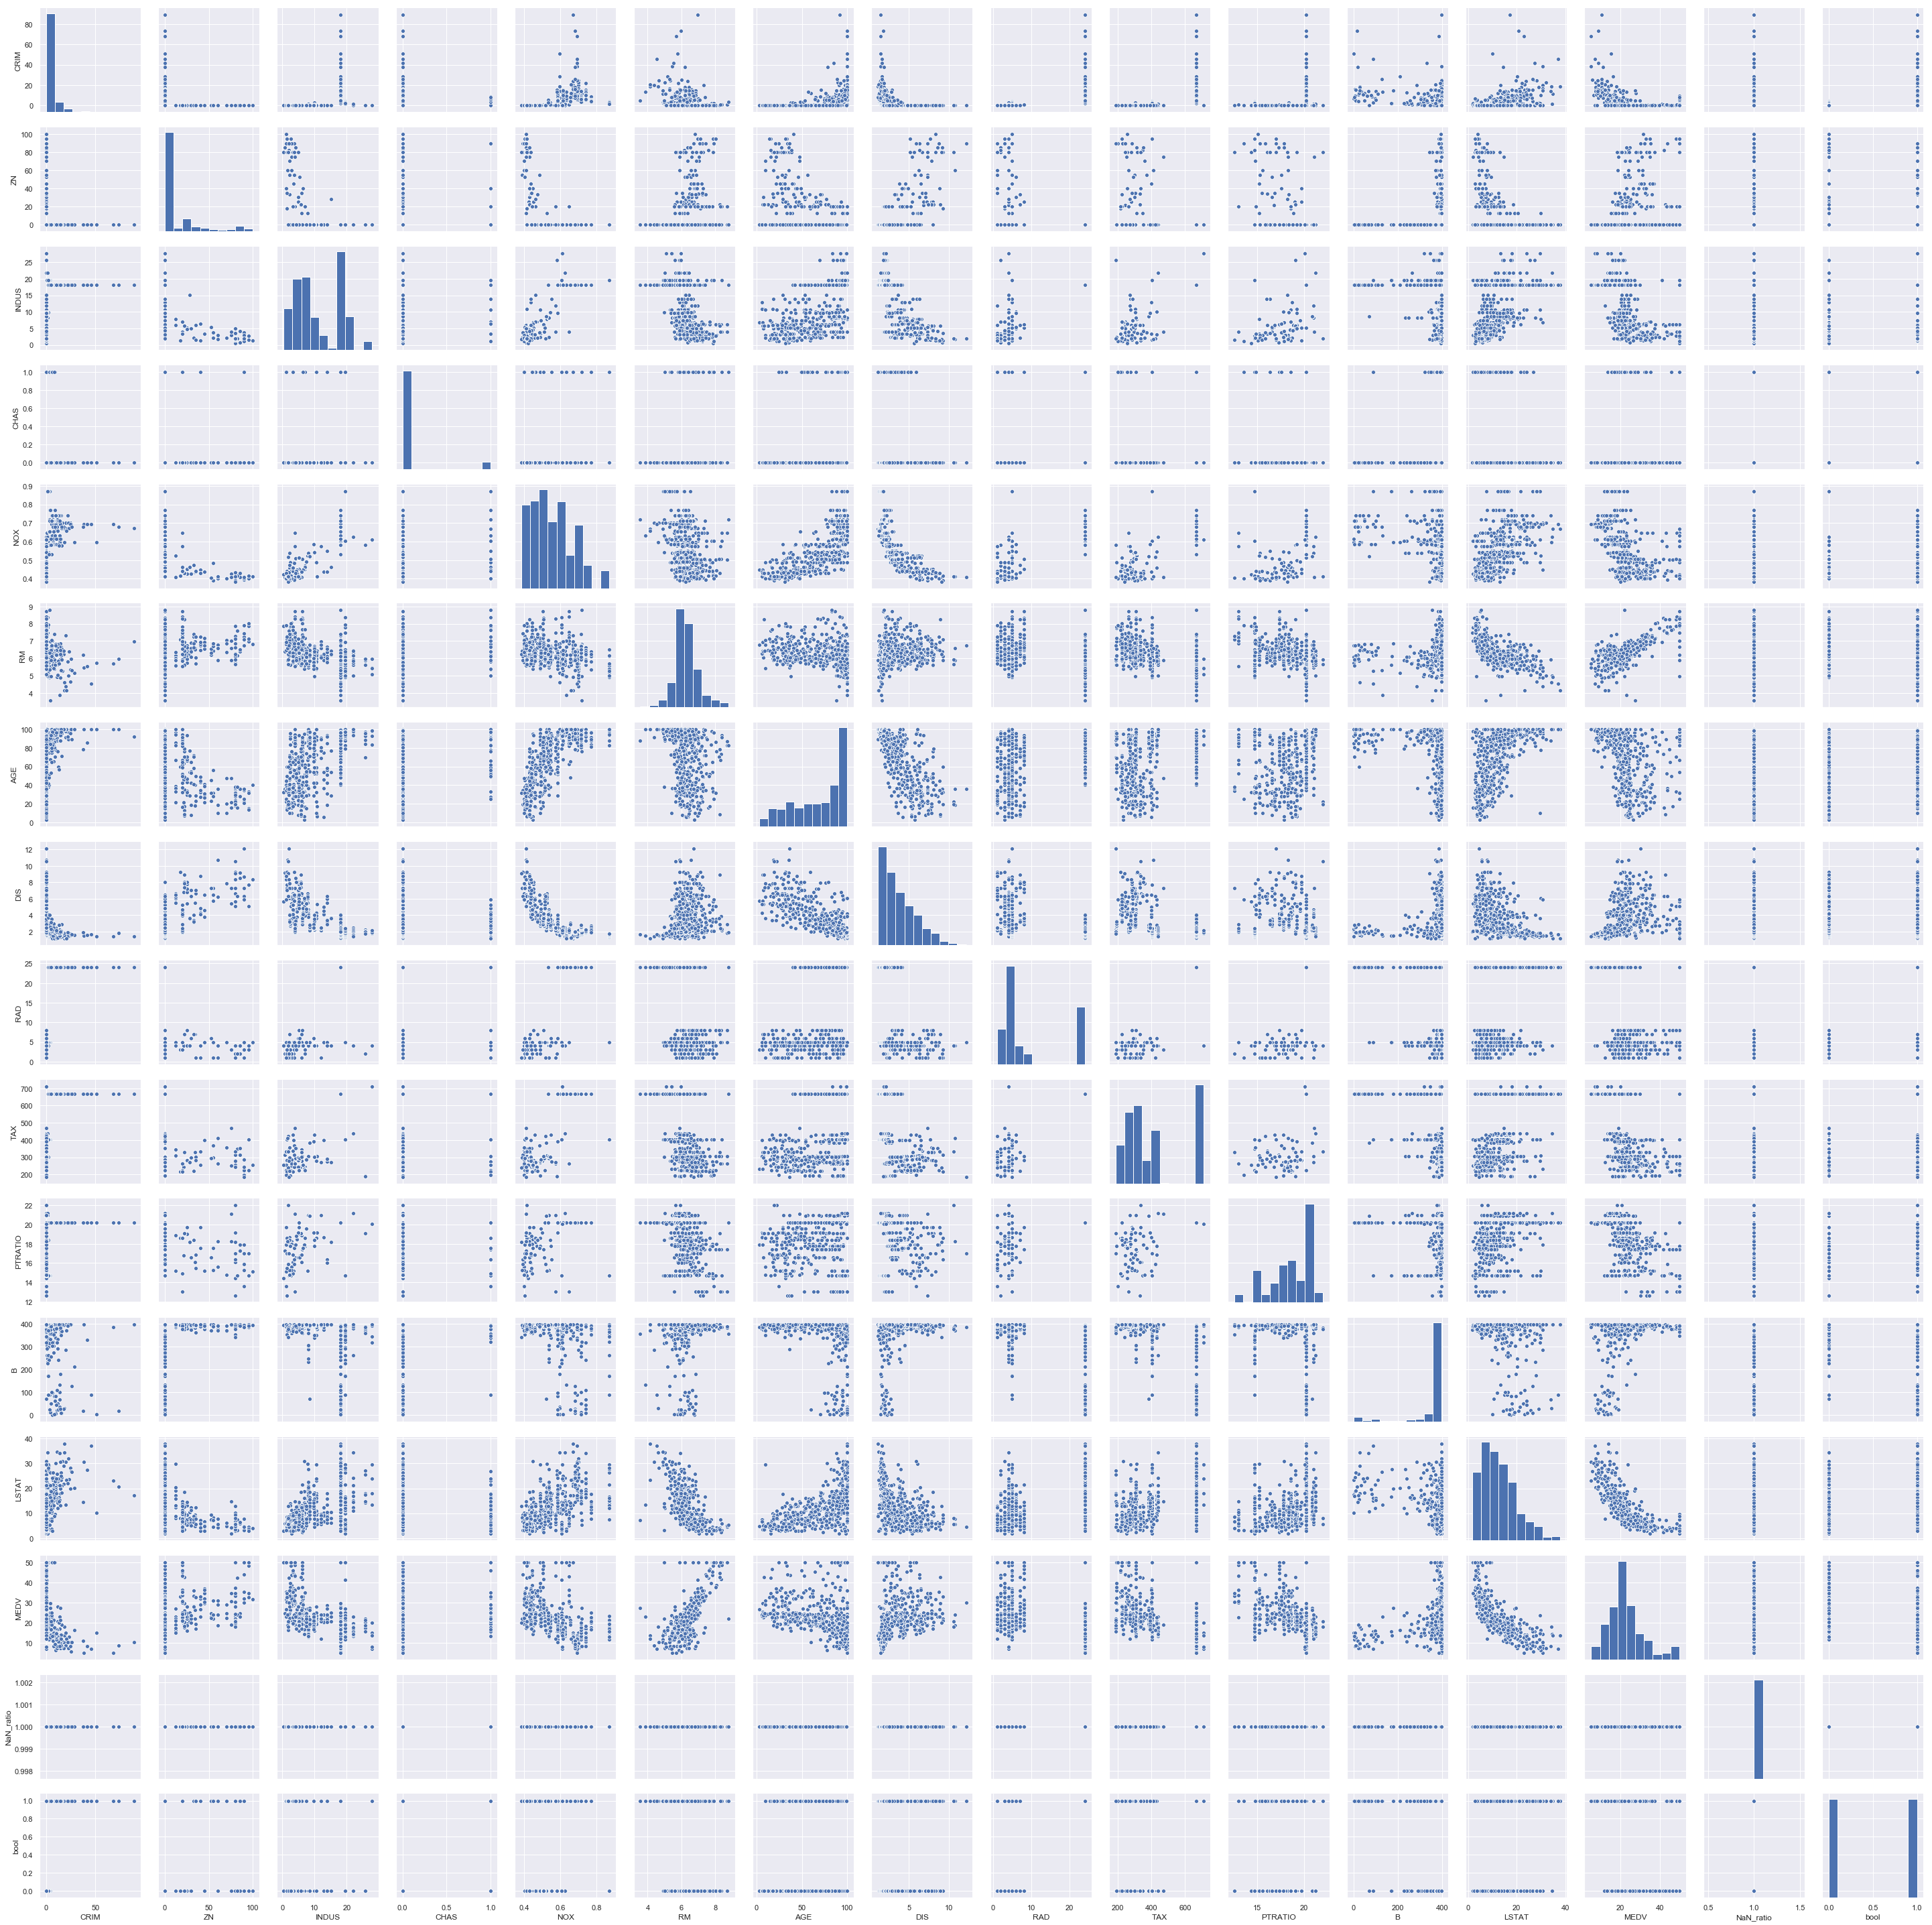

In [28]:
sns.pairplot(dataset)

We can calculate the correlation matrix of a dataset with feature_Feature_Correlation, which is all features correlated with all other features. Correlation, as calculated, is the linear correlation and does not quantify the non-linear behavior between any two features.

The higher the correlation between two features the nearer the correlation coefficient to the absolute of 1.0 (open interval -1.0,1.0). A feature will have a value of 1.0 with itself, because it is fully correlated with itself. If it has a negative value then it is anti-correlated. Anti-correlated feature-pairs means that if one feature increases in value, then the other feature will decrease in value.

The linear predictive strength of a feature is how correlated it is with the target feature. However, the predictive value of one of the features will decrease the higher the correlation of the feature-pair (non-target).
Usually the Pearson correlation coefficient is used, which is sensitive only to a linear relationship (or first-order) between two features. 

A Pearson correlation coefficient of -0.85 is a strong negative correlation while a correlation of 0.15 would be a weak positive correlation. Also, if a feature has a correlation correlation of |0.99| with the target then is has a very high, perhaps too high a predictive value. This dataset and specifically this feature should be checked for error(s).

Spearman's rank correlation coefficient is a measure of how well the relationship between two variables can be described by a monotonic function. 

Kendall's rank correlation coefficient is a statistic used to measure the ordinal association between two measured features. 

Spearman's rank correlation coefficient is the more widely used rank correlation coefficient. However, Kendall's is easier to understand.

In most of the situations, the interpretations of Kendall and Spearman rank correlation coefficient are very similar to Pearson correlation coefficient and thus usually lead to the same diagnosis. The feature_Feature_Correlation class calculates Pearson's,or Spearman's, or Kendall's correlation co-efficients for all feature pairs of the dataset.

Again, this class instance method is a diagnostic tool that indicates if one feature of will have low predictive power or is has high redundancy with another feature.

Care should be used before eliminating any feature. Look at the **SHAP**  value, relative variance, and correlation co-efficient in order to reach a decision to remove a feature.

Read this for a good overview of correlation:

[Read this for a good overview of correlation](https://medium.com/fintechexplained/did-you-know-the-importance-of-finding-correlations-in-data-science-1fa3943debc2)

In [29]:
cm = c.feature_Feature_Correlation(dataset)

paso 6.11.2019 12:46:41 INFO Correlation method: pearson


You can graph the feature-feature correlation matrix for a dataset with ``plot_cor```.

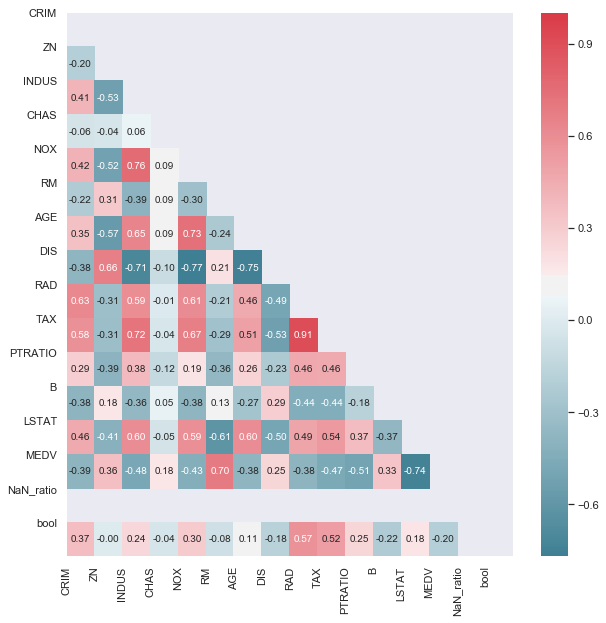

In [30]:
c.plot_corr(dataset)

## Cleaner:  delete_Features

I should mention at this point that **sklearn** has a few different algorithms for [feature selection](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#examples-using-sklearn-feature-selection-selectkbest). You might to want to look at these before removing any features.

However, I find the feature diagnosis tools given in **paso**, especially **SHAP**.  **SHAP** is state-of-the-art in determining a feature's importance in a model as of 2018 and as far as I know still the state-of-the-art. 

Please, let us know if you know something better and we add it to **paso**. This is very likely as the field is growing rapidly.

Based on your analysis, you are now ready to remove features from a **pandas** dataframe.

I will create a feature ``asv`` and then remove it using delete_features.

In [31]:
dataset['asv'] = 0
c.delete_Features(dataset,features=['asv'])
dataset.head()

paso 6.11.2019 12:46:42 INFO delete_Features ['asv']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,NaN_ratio,bool
0,0.01501,0.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1.0,0
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1.0,0
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1.0,0
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1.0,0
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,1.0,0


## Cleaner:  Removing Features that are not Common to Train and Test 

If the train or test datasets have features the other does not, then those features will have no predictive power and should be removed from both datasets. The exception being the target feature that is present in the training dataset of a supervised problem. 

Features in one dataset (train, test) and not in the other (train, test) may point to other problems in the population of these datasets. You should check the steps in your data loading.

Where I have seen this most often is the assembly test dataset from upstream services (Kafka, Google PubSub, Amazon Kinesis Stream, PySpark, and RabbitMQ, to name a few). 

The features of the test dataset are changed while the pre-trained model (and thus the training set) do not have these new features feature. Depending on your error handling, what happens usually is failure.

Using `` ``:
1. Differences in the features of the train and test datasets are removed.
2. What features have been removed are logged for later reconciliation.
3. The prediction from the input test dataset is successfully handled by the pre-trained model.

[A good overview to data streamingcan be found at this link.](https://medium.com/analytics-vidhya/data-streams-and-online-machine-learning-in-python-a382e9e8d06a)

To create test and train datasets, we can use 30% of ``City`` as test, leaving 70% of ``City`` as train.

In [32]:
from sklearn.model_selection import train_test_split
train, test, train_target, test_target = train_test_split( dataset[dataset.columns.difference(['CRIM'])]
                                              ,  dataset['MEDV']
                                              , test_size=0.3
                                              , random_state=88)

train.shape,train_target.shape, test.shape,  test_target.shape

((353, 15), (353,), (152, 15), (152,))

In [33]:
test['extraFeature'] = 10
test.head(n=2)

,AGE,B,CHAS,DIS,INDUS,LSTAT,MEDV,NOX,NaN_ratio,PTRATIO,RAD,RM,TAX,ZN,bool,extraFeature
460,88.4,391.43,0.0,2.5671,18.10,14.65,17.7,0.713,1.0,20.2,24.0,6.376,666.0,0.0,1,10
155,94.0,88.63,0.0,1.7364,19.58,16.14,13.1,0.871,1.0,14.7,5.0,5.272,403.0,0.0,0,10


In [34]:
x = c.delete_Features_not_in_train_or_test(train,test,inplace=False)
x[1].head(n=2)

paso 6.11.2019 12:46:42 INFO Clean_Features_not_in_y ['extraFeature']


,AGE,B,CHAS,DIS,INDUS,LSTAT,MEDV,NOX,NaN_ratio,PTRATIO,RAD,RM,TAX,ZN,bool
460,88.4,391.43,0.0,2.5671,18.10,14.65,17.7,0.713,1.0,20.2,24.0,6.376,666.0,0.0,1
155,94.0,88.63,0.0,1.7364,19.58,16.14,13.1,0.871,1.0,14.7,5.0,5.272,403.0,0.0,0


In the above example, the returned two dataframes are the transform of ``train`` and ``test``. By using ``inplace=False``, the ``test``dataset is not changed. 

## Summary

Starting with Python 3.6 (PEP 484), type hints were introduced. Type hints (note: not strong type checking) make it possible to also do static type checking of Python code.

Type hints are not used by the Python language interpreter except to check for proper syntax. Type hints are rather used by downstream tools, such as ``PyCharm`` and ``Mypy``.

Better documentation and catching of type bugs before they occur at run-time are some of the benefits you will see from this first wave of tools. 

You can bet that someone is working on a compiler for Python to make it faster at run-time. Further down the road, you can imagine tools that transform dynamically typed Python with typed notation.

The real beauty is a language that puts typing into downstream tools, enabling the software engineer to focus on the why and leaving a large part of the how to tools.

Using type hints, the Cleanersand Imputers class methods call signatures are summarized:

from paso.pre.cleaners import Cleaners
c = Cleaners()
    # 1
    c.values_to_nan(self, X: pd.DataFrame, values: List[str]=[], inplace:bool=True, verbose:bool=True) ->  pd.DataFrame:
    #2
    c.delete_NA_Features(self, X: pd.DataFrame, threshold:float =1.0, inplace:bool=True, verbose:bool=True) ->  pd.DataFrame:
    #3
    c.calculate_NaN_ratio(self, X:pd.DataFrame, inplace:bool=True, verbose:bool=True) ->  pd.DataFrame:
    #4
    c.delete_Duplicate_Features(self, X:pd.DataFrame, ignore:List[str], inplace:bool=True, verbose:bool=True) ->  pd.DataFrame:
    #5
    c.delete_Features_with_Single_Unique_Value(self, X:pd.DataFrame, ignore:List[str], inplace:bool=True, verbose:bool=True) ->  pd.DataFrame:
    #6
    c.delete_Features_with_All_Unique_Values(self, X:pd.DataFrame, ignore:List[str], inplace:bool=True, verbose:bool=True) ->  pd.DataFrame:
    #7
    c.statistics() -> List[str]
    #8
    c.feature_Statistics(self, X:pd.DataFrame, statistics:str="all", concat:bool=True, inplace:bool=True, verbose:bool=True
    ) -> pd.DataFrame:
    #9
    c.boolean_to_integer(self, X:pd.DataFrame, inplace:bool=True, verbose:bool=True) -> pd.DataFrame:
    #10
    c.feature_Feature_Correlation(self, X:pd.DataFrame, method:str="pearson", verbose:bool=True) -> pd.DataFrame
    #11
    c.plot_corr(self, X: pd.DataFrame, kind:str="numeric", mirror:bool=False, xsize:float=10, ysize:float=10)-> None:
    #12
    c.delete_Features(self, X:pd.DataFrame, features:List[str]=[], verbose:bool=True, inplace:bool=True) -> pd.DataFrame:
    #13
    c.delete_Features_not_in_train_or_test(self):self, train:pd.DataFrame, test:pd.DataFrame, ignore:List[str]=[], verbose:bool=True, inplace:bool=True) -> pd.DataFrame:
    #14
    imputer_file = "../descriptions/pre/cleaners/most_frequent_impute.yaml
    imp = Imputers(description_filepath: str = imputer_file)
    imp.imputers() -> List[str]:
    #15
    imp.transform(self, X: pd.DataFrame, verbose: bool = True, inplace: bool = True, features: List[str] = None, **kwargs) -> pd.DataFrame

The code for this article is given in [.ipynb](https://github.com/bcottman/paso/blob/master/lessons/lesson-2.ipynb) and [.py](https://github.com/bcottman/paso/blob/master/paso/pre/cleaners.py) files.

Other lessons on **paso** are:

[**paso**'s Offering of Logging and Parameter Services for your Python Project](https://github.com/bcottman/paso/blob/master/lessons/lesson_1.ipynb)

[Part 1: Balancing and Augmenting Structured Data](https://medium.com/@dr.bruce.cottman/part-1-balancing-and-augmenting-structured-data-4ade0df38662)

In the future, we will cover **paso** in more depth with the following lessons:
- Part 2: Advanced augmentation on structured data.
- Part 2: Deep learning imputing.
.
If you have a service or feature or see a bug, then leave the **paso** project a [note](https://github.com/bcottman/paso/issues).